<a href="https://colab.research.google.com/github/jcamejo55/SyS2025/blob/main/Parcial1_Se%C3%B1alesSistemas_Jhon_Camejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Parcial 1: Conceptos Básicos y Serie de Fourier***
# ***C.C. 1006476588***
***Jhon Enrique Camejo Orozco***
---



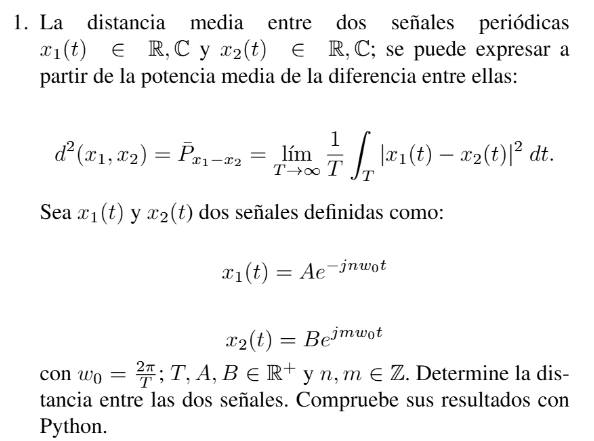




## Comprobación cálculo simbolico

In [ ]:
import sympy as sp

#Variables
t, T, A, B = sp.symbols('t T A B', positive=True, real=True)
n, m = sp.symbols('n m', integer=True)

w0 = 2 * sp.pi / T

#Señales
x1 = A * sp.exp(-sp.I * n * w0 * t)
x2 = B * sp.exp(sp.I * m * w0 * t)

#Diferencia y su magnitud al cuadrado
diff = sp.Abs(x1 - x2)**2

#Promedio
d = (1/T) * sp.integrate(diff, (t, 0, T))

#Simplificación
d_simpli = sp.simplify(d)

#Resultado
sp.pretty_print(d_simpli)

⎧     2    2                
⎪    A  + B       for m ≠ -n
⎨                           
⎪ 2            2            
⎩A  - 2⋅A⋅B + B   otherwise 


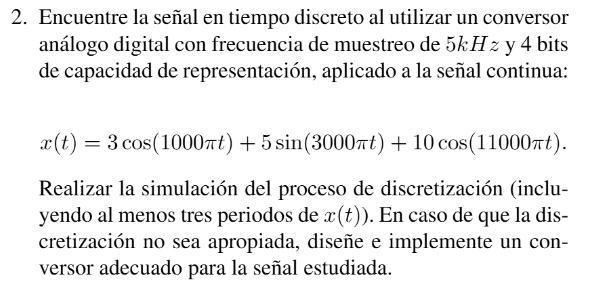

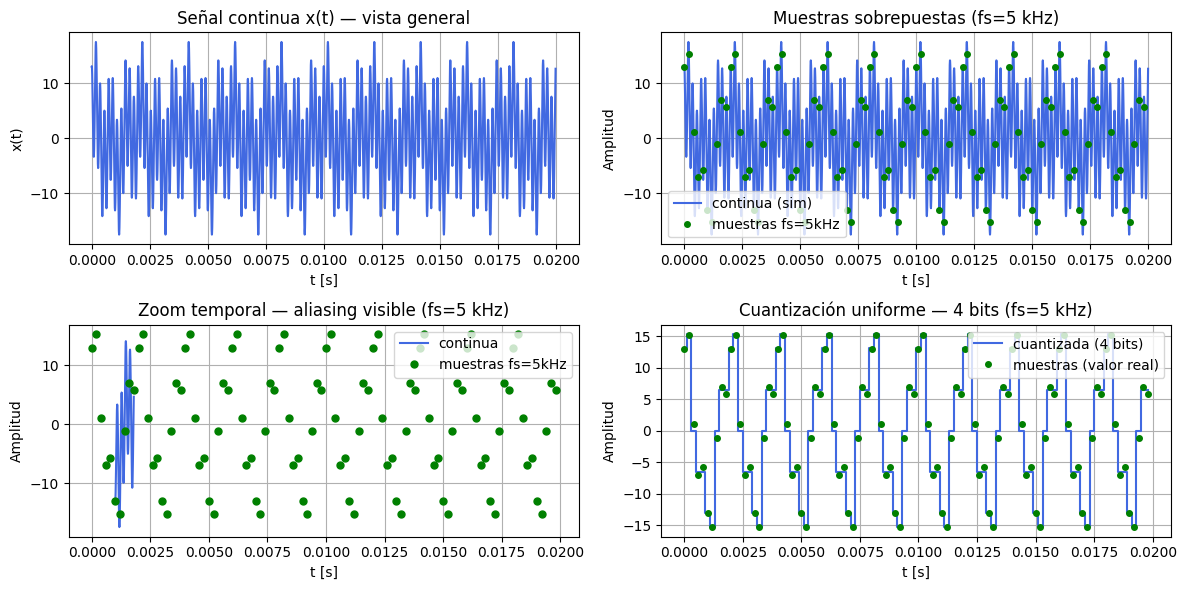

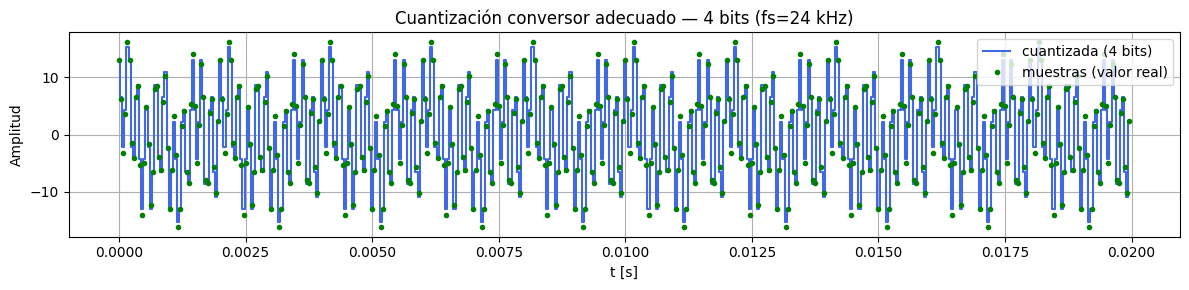

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Señal continua ---
A1 = 3.0; f1 = 500   # 3 cos(1000 pi t) -> f = 1000π/(2π)=500 Hz
A2 = 5.0; f2 = 1500     # 5 sin(3000 π t) -> f = 1500 Hz
A3 = 10.0; f3 = 5500    # 10 cos(11000 π t) -> f = 5500 Hz

# Parámetros de simulación en tiempo continuo (resolución alta)
fs_cont = 200000  # frecuencia de muestreo "continua" para la simulación
t_end = 0.02        # 20 ms (>= 3 periodos; periodo fundamental = 1/500 = 2 ms)
t = np.arange(0, t_end, 1/fs_cont)

# Señal continua x(t)
x_cont = A1*np.cos(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.cos(2*np.pi*f3*t)

# --- Conversor original propuesto en el enunciado ---
fs1 = 5000   # 5 kHz
bits1 = 4      # 4 bits
t_s1 = np.arange(0, t_end, 1/fs1)
x_s1 = A1*np.cos(2*np.pi*f1*t_s1) + A2*np.sin(2*np.pi*f2*t_s1) + A3*np.cos(2*np.pi*f3*t_s1)

# Cuantización (uniforme, rango simétrico basado en amplitud máxima)
xmax = np.max(np.abs(x_cont))
levels1 = 2**bits1
delta1 = 2*xmax/levels1
# cuantizar a niveles centrados (niveles = -(L/2-0.5)*delta ... +(L/2-0.5)*delta)
xq1 = (np.round(x_s1 / delta1) * delta1)
# limitar al rango
xq1 = np.clip(xq1, -xmax + delta1/2, xmax - delta1/2)

# --- Conversor adecuado diseñado ---
# Requerimiento: fs > 2*fmax = 11000 Hz. Elegimos fs2 = 24000 Hz (suficiente)
fs2 = 24000
bits2 = 4
t_s2 = np.arange(0, t_end, 1/fs2)
x_s2 = A1*np.cos(2*np.pi*f1*t_s2) + A2*np.sin(2*np.pi*f2*t_s2) + A3*np.cos(2*np.pi*f3*t_s2)

levels2 = 2**bits2
delta2 = 2*xmax/levels2
xq2 = (np.round(x_s2 / delta2) * delta2)
xq2 = np.clip(xq2, -xmax + delta2/2, xmax - delta2/2)

# --- Plots ---
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.ravel()

# 1) Señal continua (vista general)
axs[0].plot(t, x_cont, color='royalblue')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('x(t)')
axs[0].set_title('Señal continua x(t) — vista general')
axs[0].grid(True)

# 2) Superposición: continua + muestras (fs=5 kHz)
axs[1].plot(t, x_cont, color='royalblue', label='continua (sim)')
axs[1].plot(t_s1, x_s1, 'o', color='green', markersize=4, label='muestras fs=5kHz')
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Muestras sobrepuestas (fs=5 kHz)')
axs[1].legend()
axs[1].grid(True)

# 3) Zoom: componente a 5500 Hz se pliega
t0 = 0.001
idx_zoom = (t >= t0) & (t < t0 + 0.0008)
axs[2].plot(t[idx_zoom], x_cont[idx_zoom], color='royalblue', label='continua')
axs[2].plot(t_s1, x_s1, 'o', color='green', markersize=5, label='muestras fs=5kHz')
axs[2].set_xlabel('t [s]')
axs[2].set_ylabel('Amplitud')
axs[2].set_title('Zoom temporal — aliasing visible (fs=5 kHz)')
axs[2].legend()
axs[2].grid(True)

# 4) Cuantización (fs=5kHz, 4 bits)
axs[3].step(t_s1, xq1, where='mid', color='royalblue', label='cuantizada (4 bits)')
axs[3].plot(t_s1, x_s1, 'o', color='green', markersize=4, label='muestras (valor real)')
axs[3].set_xlabel('t [s]')
axs[3].set_ylabel('Amplitud')
axs[3].set_title('Cuantización uniforme — 4 bits (fs=5 kHz)')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

# --- 5) Cuantización del conversor adecuado (fuera de la cuadrícula) ---
plt.figure(figsize=(12,3))
plt.step(t_s2, xq2, where='mid', color='royalblue', label='cuantizada (4 bits)')
plt.plot(t_s2, x_s2, 'o', color='green', markersize=3, label='muestras (valor real)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.title('Cuantización conversor adecuado — 4 bits (fs=24 kHz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




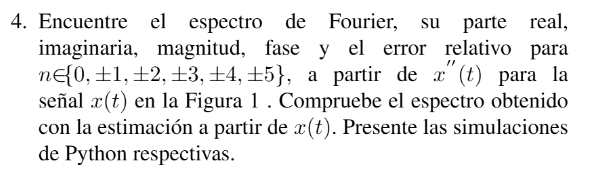

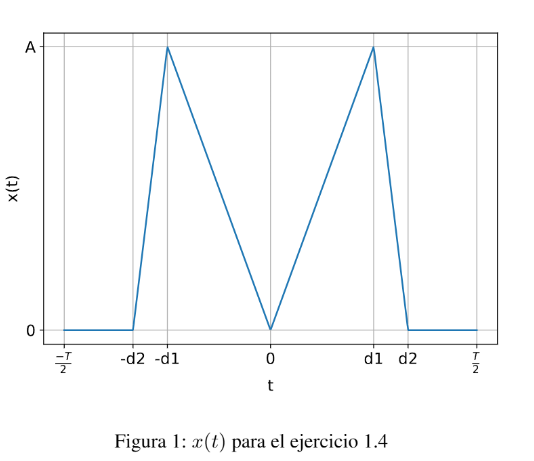

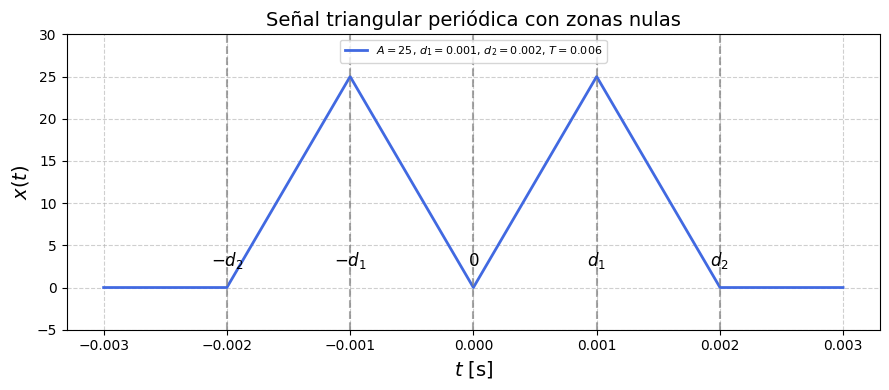

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 25           # Amplitud
d1 = 1e-3        # Punto medio
d2 = 2e-3        # Fin del triángulo
T = 6e-3         # Periodo total -> debe ser mayor que 2*d2

# Vector de tiempo: un periodo completo centrado en 0
Fs = 1e6
t = np.arange(-T/2, T/2, 1/Fs)

# Inicializamos x(t)
x = np.zeros_like(t)

# ----- Definición por tramos -----
# Tramo 1: -d2 <= t < -d1  → sube
idx1 = np.where((t >= -d2) & (t < -d1))
x[idx1] = A * (t[idx1] + d2) / (d2 - d1)

# Tramo 2: -d1 <= t < 0  → baja lineal
idx2 = np.where((t >= -d1) & (t < 0))
x[idx2] = -A * t[idx2] / d1

# Tramo 3: 0 <= t < d1  → sube lineal
idx3 = np.where((t >= 0) & (t < d1))
x[idx3] = A * t[idx3] / d1

# Tramo 4: d1 <= t < d2  → baja lineal
idx4 = np.where((t >= d1) & (t < d2))
x[idx4] = A * (d2 - t[idx4]) / (d2 - d1)

# ----- Gráfica -----
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(t, x, color='royalblue', linewidth=2, label=fr'$A={A}$, $d_1={d1}$, $d_2={d2}$, $T={T}$')

# Líneas verticales de referencia
ax.axvline(-d2, color='gray', linestyle='--', alpha=0.7)
ax.axvline(-d1, color='gray', linestyle='--', alpha=0.7)
ax.axvline(0, color='gray', linestyle='--', alpha=0.7)
ax.axvline(d1, color='gray', linestyle='--', alpha=0.7)
ax.axvline(d2, color='gray', linestyle='--', alpha=0.7)

# Etiquetas de texto
ax.text(-d2, A/10, r'$-d_2$', fontsize=12, ha='center')
ax.text(-d1, A/10, r'$-d_1$', fontsize=12, ha='center')
ax.text(0, A/10, r'$0$', fontsize=12, ha='center')
ax.text(d1, A/10, r'$d_1$', fontsize=12, ha='center')
ax.text(d2, A/10, r'$d_2$', fontsize=12, ha='center')

# Configuración del gráfico
ax.set_xlabel(r'$t$ [s]', fontsize=14)
ax.set_ylabel(r'$x(t)$', fontsize=14)
ax.set_title('Señal triangular periódica con zonas nulas', fontsize=14)
ax.set_ylim([-0.2*A, 1.2*A])
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=8, loc='upper center')
plt.tight_layout()
plt.show()


In [ ]:
# se presenta la simulación del espectro y la reconstrucción
# construir bases serie exponencial
N = 15 # número de armónicos
wo = 2 * np.pi / T  # frecuencia fundamental

# definir bases
phin = np.zeros((len(t), 2*N+1), dtype=np.complex128)  # crear matriz para guardar bases
for n in range(-N, N+1, 1):
    phin[:, n+N] = np.exp(1j * n * wo * t)  # base de Fourier en el intervalo de interés

# espectro de la señal - serie exponencial
# calcular espectro según la señal triangular estudiada
Cn = np.zeros(2*N+1, dtype=np.complex128)
nv = np.arange(-N, N+1)

for i, n in enumerate(nv):
    if n == 0:
        Cn[i] = (A * d2) / T  # c0
    else:
        Cn[i] = -(A*T)/(2*(np.pi**2)*(n**2)) * (
            (np.cos(n*wo*d2)/(d2-d1))
            - (d2/(d1*(d2-d1)))*np.cos(n*wo*d1)
            + 1/(2*d1)
        )

In [1]:
from IPython.display import display, Math

latex = r"""
\displaystyle
x(t)=\begin{cases}
0, & -\dfrac{T}{2}\le t < -d_2,\\[4pt]
A\displaystyle\frac{t + d_2}{\,d_2 - d_1\,}, & -d_2 \le t < -d_1,\\[8pt]
-\dfrac{A}{d_1}\,t, & -d_1 \le t < 0,\\[8pt]
\hphantom{-}\dfrac{A}{d_1}\,t, & 0 \le t < d_1,\\[8pt]
A\displaystyle\frac{d_2 - t}{\,d_2 - d_1\,}, & d_1 \le t < d_2,\\[6pt]
0, & d_2 \le t \le \dfrac{T}{2},
\end{cases}
\qquad x(t+T)=x(t),
\quad\text{con } 0<d_1<d_2\le \tfrac{T}{2}.
"""

display(Math(latex))

<IPython.core.display.Math object>

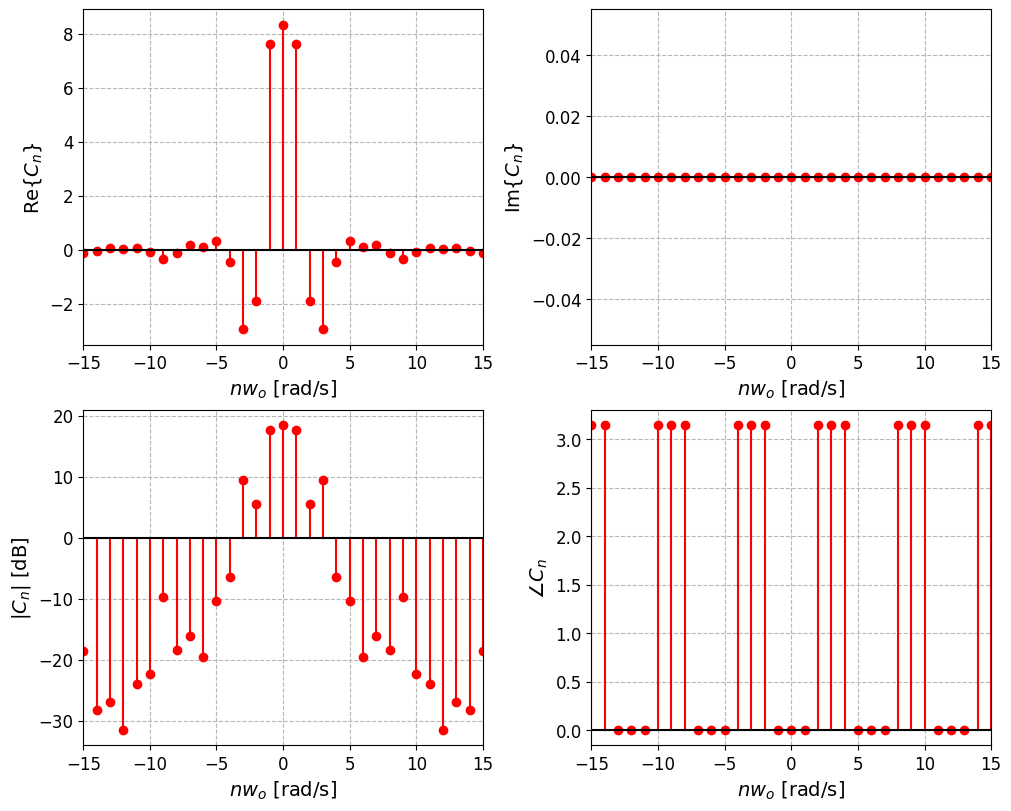

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

axs[0, 0].stem(nv, np.real(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 0].set_xlabel(r'$nw_o$ [rad/s]', fontsize=14)
axs[0, 0].set_ylabel(r'$\mathrm{Re}\{C_n\}$', fontsize=14)
axs[0, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[0, 1].stem(nv, np.imag(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 1].set_xlabel(r'$nw_o$ [rad/s]', fontsize=14)
axs[0, 1].set_ylabel(r'$\mathrm{Im}\{C_n\}$', fontsize=14)
axs[0, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[1, 0].stem(nv, 20 * np.log10(np.abs(Cn)), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 0].set_xlabel(r'$nw_o$ [rad/s]', fontsize=14)
axs[1, 0].set_ylabel(r'$|C_n|$ [dB]', fontsize=14)
axs[1, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[1, 1].stem(nv, np.angle(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 1].set_xlabel(r'$nw_o$ [rad/s]', fontsize=14)
axs[1, 1].set_ylabel(r'$\angle C_n$', fontsize=14)
axs[1, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

for ax in axs.flat:
    ax.tick_params(labelsize=12)
    ax.set_xlim([nv[0], nv[-1]])

plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:34: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:34: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipython-input-3361792519.py:30: SyntaxWarning: invalid escape sequence '\{'
  ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')
/tmp/ipython-input-3361792519.py:34: SyntaxWarning: invalid escape sequence '\{'
  ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


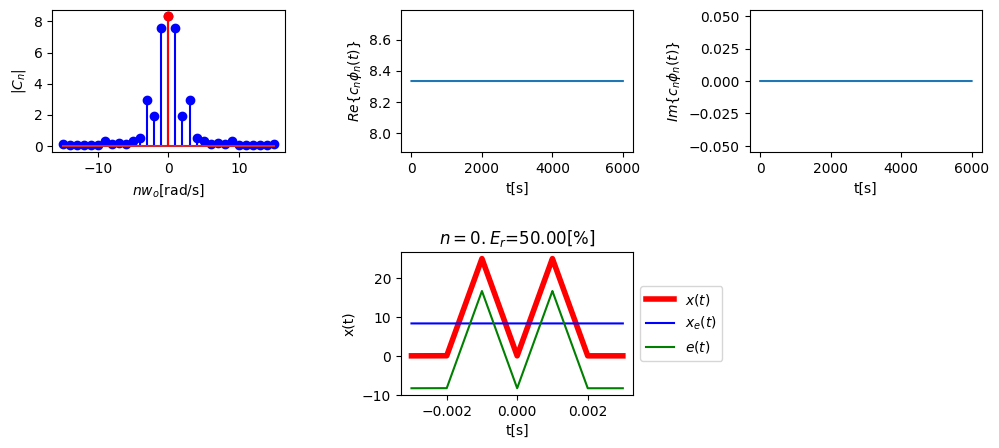

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (2*(A**2)*d2)/(3*T)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = (phin[:,ind]).dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- ((np.sum(abs(Cn[ind])**2))/Px)
    #señal reconstruida
    xe = (phin[:,ind]).dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = x - xe

    ax[1,1].plot(t,x,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(t,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(t,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)


#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')


anim